# **OBJECTIVE:**

**To Predict whether a Patient has Diabetes based on certain diagnostic measurements included in the dataset.**

**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Loading the dataset

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Features Description**

**Pregnancies:** No.times pregnant.

**Glucose:** Plasma glucose concentration a 2 hours in a glucose tolerance test.

**BloodPressure:** Diastolic blood pressure(mm/Hg)

**skinThickness:** Triceps skin fold thickness(mm)

**Insulin:** 2 hour serum insulin(mu U/ml)

**BMI:** Body mass index(weight in KG/ (Height in m)^2)

**DiabetesPedigreeFunction:** Diabetes Pedigree Function

**Age:** Age in years

**Outcome:** result **Yes if "1" or No if "0"**

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Checking the shape of the dataset
data.shape

(768, 9)

In [5]:
# Checking the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Looking for missing values
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Checking Basic stats
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# Looking insights about features with the target(outcome)
data.corr()[['Outcome']]

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


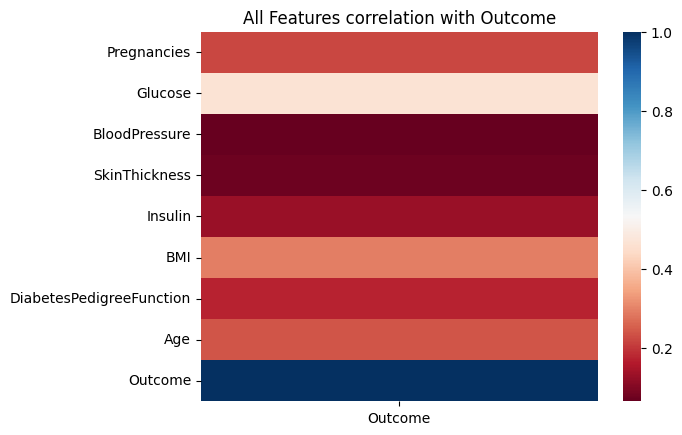

In [9]:
# Let's check correlation using heatmap
sns.heatmap(data.corr()[['Outcome']],cmap='RdBu')
plt.title("All Features correlation with Outcome")
plt.show()

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

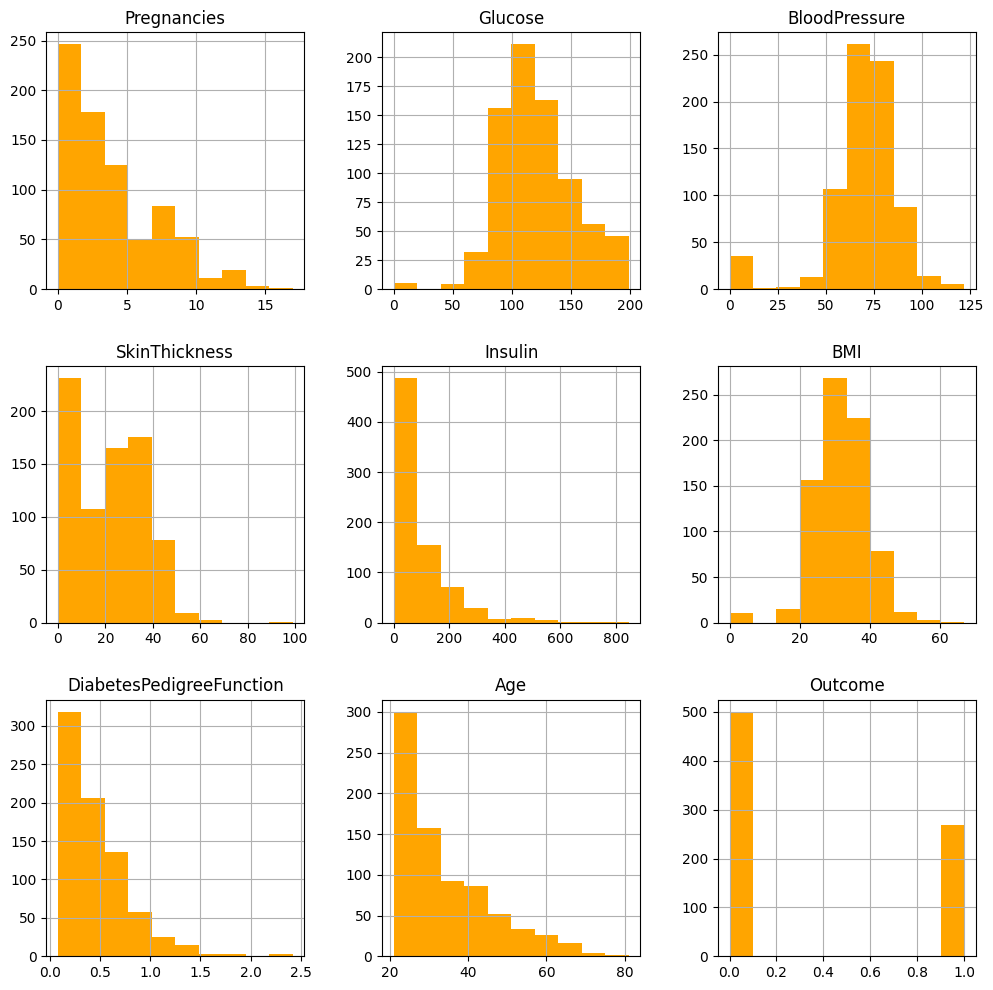

In [11]:
# Checking the Hisplot of the column
data.hist(figsize=(12,12),color = 'orange')
plt.show()

In [12]:
print("Minimum Vales in Columns:")

for i in data.columns:
  x = data[i].min()
  print(i,x)

Minimum Vales in Columns:
Pregnancies 0
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0.0
DiabetesPedigreeFunction 0.078
Age 21
Outcome 0


Here i can observe that the minimum values for some column is O which does not make sense in real time. So, we wil change that with the Average value.

In [13]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
glucose_mean = data['Glucose'].mean()
Bp_mean = data['BloodPressure'].mean()
Skin_mean = data['SkinThickness'].mean()
Insulin_mean = data['Insulin'].mean()
BMI_mean = data['BMI'].mean()

print('Average Glucose is:', glucose_mean)
print('Average BloodPressure is:', Bp_mean)
print('Average SkinThickness is:', Skin_mean)
print('Average Insulin is:', Insulin_mean)
print('Average BMI is:', BMI_mean)

Average Glucose is: 120.89453125
Average BloodPressure is: 69.10546875
Average SkinThickness is: 20.536458333333332
Average Insulin is: 79.79947916666667
Average BMI is: 31.992578124999998


**Making a new dataframe and replace the 0 with the mean**

In [15]:
new_data = data.copy()

In [16]:
new_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
# Now let's replace the 0 with the mean of repespective columns.
new_data['Glucose'] = new_data['Glucose'].replace(0,glucose_mean)
new_data['BloodPressure'] = new_data['BloodPressure'].replace(0,Bp_mean)
new_data['SkinThickness'] = new_data['SkinThickness'].replace(0,Skin_mean)
new_data['Insulin'] = new_data['Insulin'].replace(0,Insulin_mean)
new_data['BMI'] = new_data['BMI'].replace(0,BMI_mean)

In [18]:
print("Minimum Vales in Columns:")

for i in new_data.columns:
  x = new_data[i].min()
  print(i,x)

Minimum Vales in Columns:
Pregnancies 0
Glucose 44.0
BloodPressure 24.0
SkinThickness 7.0
Insulin 14.0
BMI 18.2
DiabetesPedigreeFunction 0.078
Age 21
Outcome 0


Now i want to compare the distribution of the data between the old and the new dataset using a violonplot.

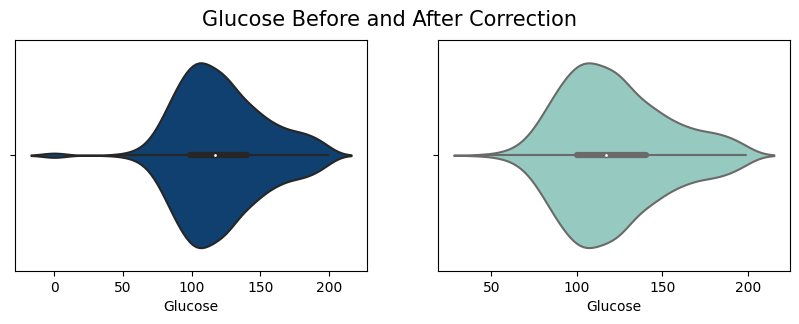

In [19]:
fig,axes= plt.subplots(1,2, figsize=(10,3))
plt.suptitle('Glucose Before and After Correction', fontsize = 15)
sns.set(style='whitegrid')

sns.violinplot(ax=axes[0], x=data['Glucose'], data=data, palette='ocean')
sns.violinplot(ax=axes[1], x=new_data['Glucose'], data=data, palette='Set3')
plt.show()

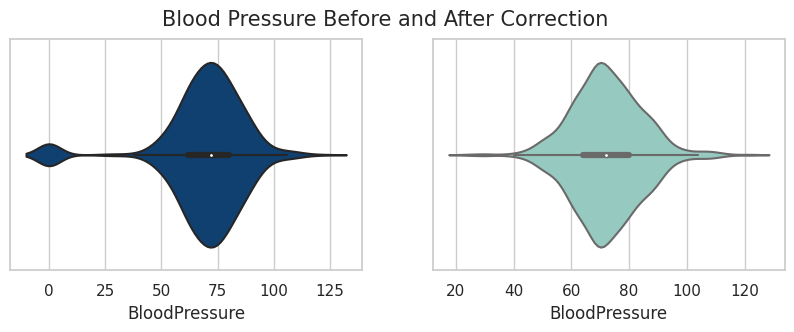

In [20]:
fig,axes= plt.subplots(1,2, figsize=(10,3))
plt.suptitle('Blood Pressure Before and After Correction', fontsize = 15)
sns.set(style='whitegrid')

sns.violinplot(ax=axes[0], x=data['BloodPressure'], data=data, palette='ocean')
sns.violinplot(ax=axes[1], x=new_data['BloodPressure'], data=data, palette='Set3')
plt.show()

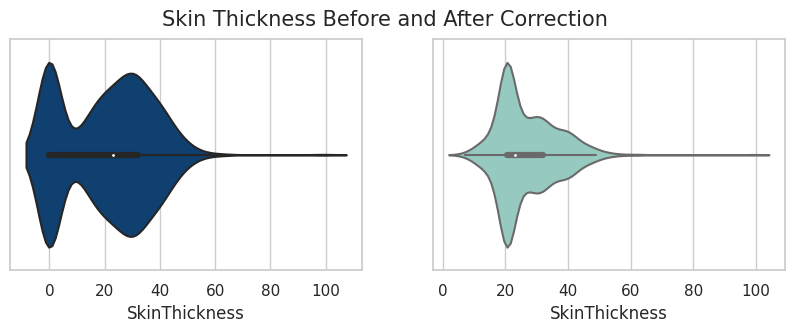

In [21]:
fig,axes= plt.subplots(1,2, figsize=(10,3))
plt.suptitle('Skin Thickness Before and After Correction', fontsize = 15)
sns.set(style='whitegrid')

sns.violinplot(ax=axes[0], x=data['SkinThickness'], data=data, palette='ocean')
sns.violinplot(ax=axes[1], x=new_data['SkinThickness'], data=data, palette='Set3')
plt.show()

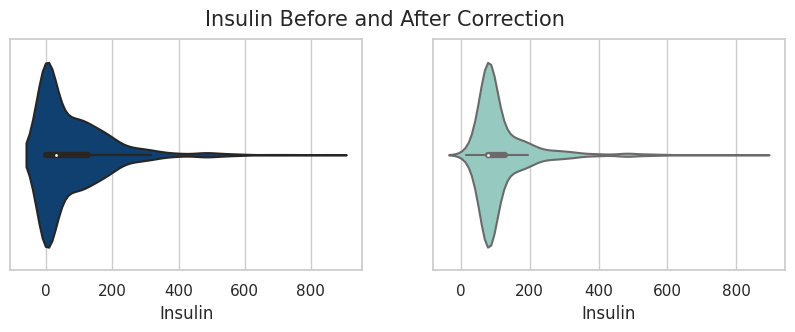

In [22]:
fig,axes= plt.subplots(1,2, figsize=(10,3))
plt.suptitle('Insulin Before and After Correction', fontsize = 15)
sns.set(style='whitegrid')

sns.violinplot(ax=axes[0], x=data['Insulin'], data=data, palette='ocean')
sns.violinplot(ax=axes[1], x=new_data['Insulin'], data=data, palette='Set3')
plt.show()

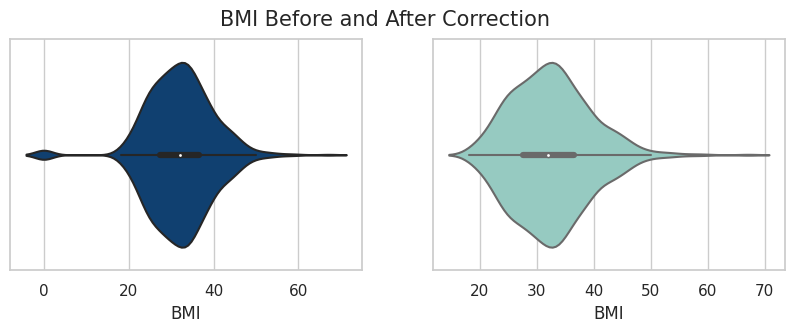

In [23]:
fig,axes= plt.subplots(1,2, figsize=(10,3))
plt.suptitle('BMI Before and After Correction', fontsize = 15)
sns.set(style='whitegrid')

sns.violinplot(ax=axes[0], x=data['BMI'], data=data, palette='ocean')
sns.violinplot(ax=axes[1], x=new_data['BMI'], data=data, palette='Set3')
plt.show()

# **Let's Work on Machine learning model to predict Outcome**

In [24]:
# Features selection
x = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]

In [25]:
# Splitting the data into training and testing

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [26]:
# Standardizing the feature
scaler = StandardScaler()

# Fitting the scaler on the training data and fit it
x_train = scaler.fit_transform(x_train)

# Transform the test data using the scaler
x_test = scaler.transform(x_test)

In [27]:
# Training the model
# Creating the logisitc regression model
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [28]:
# Making the prediction
y_pred = model.predict(x_test)

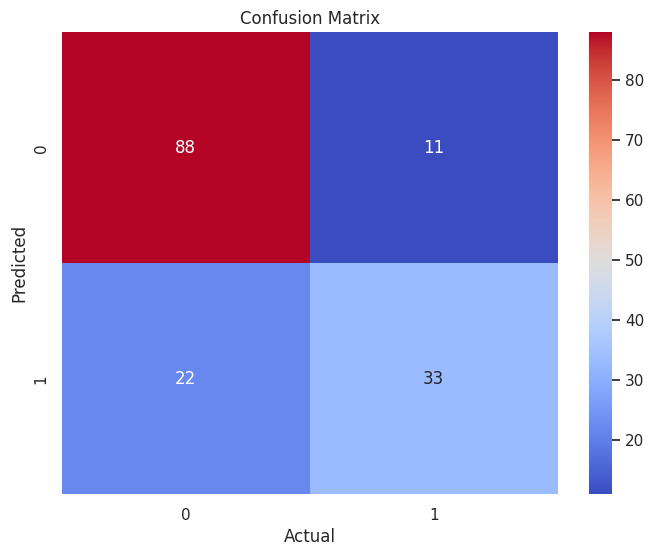

In [29]:
# Looking at the confusion matrix and then plot the heatmap
# [[True Positive (TN) False Positive(FN)]]
# [[False Negative (FN) True Negative(TP)]]
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True, cmap ='coolwarm')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Model prediction with Precision, Recall and F1 scores
target_names = ['No Diabetes','Diabetes']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

 No Diabetes       0.80      0.89      0.84        99
    Diabetes       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [31]:
# Check the accuracy of the model
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy of the model is:', accuracy*100)

Accuracy of the model is: 78.57142857142857


# **CONCLUSION:**
This project provides valuable insight into prediction of Diabetes following historical record data of a patient.

The logistic regression model with an accuracy of 78.57%, shows potential in making reasonable decisions.